In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from pyvis.network import Network
import networkx as nx

6.	Driver Movements & Team Networks:<br>
○	Map driver transitions across teams use network graph for visualizations.


In [4]:
results = pd.read_csv('final_dataset/results.csv')
driver = pd.read_csv('final_dataset/drivers.csv')
constructor = pd.read_csv('final_dataset/constructors.csv')
races = pd.read_csv('final_dataset/races.csv')

results = results.merge(races[['raceId', 'year']], on='raceId', how='left')
results = results.merge(driver[['driverId','forename', 'surname']], on='driverId', how='left')
results = results.merge(constructor[['constructorId', 'name']], on='constructorId', how='left')
results['forename'] = results['forename'].astype('str')
results['surname'] = results['surname'].astype('str')
results['Name']  = results['forename']+" "+results['surname']
results.drop(columns=['forename','surname'],inplace=True)
results.rename(columns={'name':'Constructor_name'},inplace=True)

driver_movements = results[['year', 'Name', 'Constructor_name']].drop_duplicates()
driver_movements.head()

,year,Name,Constructor_name
0,2008,lewis hamilton,mclaren
1,2008,nick heidfeld,bmw sauber
2,2008,nico rosberg,williams
3,2008,fernando alonso,renault
4,2008,heikki kovalainen,mclaren


In [9]:
driver_movements.sort_values(by='year',ascending=True,inplace=True)

In [18]:
net_data = []
for name,name_data in driver_movements.groupby('Name'):
    prev_team = None
    for row_id,row in name_data.iterrows():
        if prev_team is None:
            net_data.append([name,row['Constructor_name'],row['Constructor_name']])
            prev_team = row['Constructor_name']
        elif row['Constructor_name'] == prev_team:
            continue
        else:
            net_data.append([name,prev_team,row['Constructor_name']])
            prev_team = row['Constructor_name']

In [19]:
net_data = pd.DataFrame(net_data,columns=['Driver','From','To'])
net_data.head()

,Driver,From,To
0,adolf brudes,veritas,veritas
1,adolfo cruz,cooper,cooper
2,adrian sutil,spyker,spyker
3,adrian sutil,spyker,force india
4,adrian sutil,force india,sauber


In [30]:
net_data.to_csv('Additional_data/network_teams.csv',index=False)

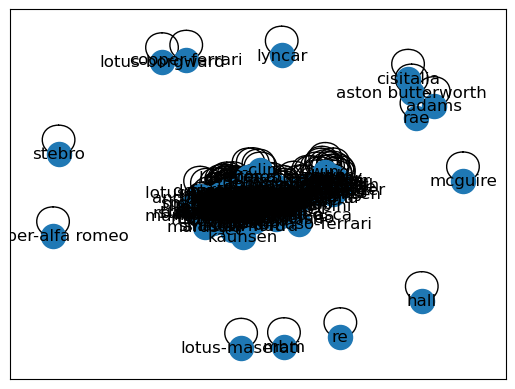

In [21]:
graph = nx.from_pandas_edgelist(net_data,'From','To')
nx.draw_networkx(graph)

In [28]:
pyvis_graph = Network(height="700px", width="100%",directed=True)
for node in graph.nodes():
    pyvis_graph.add_node(node, label=node,size=20, font={'size': 15})  
for edge in graph.edges():
    pyvis_graph.add_edge(edge[0], edge[1])
pyvis_graph.set_edge_smooth('dynamic')
pyvis_graph.show_buttons()
pyvis_graph.write_html("basic.html", open_browser=True)